## Code

In [2]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [3]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

import pickle

In [4]:
FOLDERNAME = '/content/MyDrive/MyDrive/Colab Notebooks/Computational_Neuroscience'
FILENAME = 'c1p8.pickle'
FILENAME = FOLDERNAME + '/' + FILENAME
with open(FILENAME, 'rb') as f:
    data = pickle.load(f)

stim = data['stim']
rho = data['rho']

In [9]:
def compute_sta(stim, rho, num_timesteps):
    """Compute the spike-triggered average from a stimulus and spike-train.
    
    Args:
        stim: stimulus time-series
        rho: spike-train time-series
        num_timesteps: how many timesteps to use in STA
        
    Returns:
        spike-triggered average for specified number of timesteps before spike"""
    
    sta = np.zeros((num_timesteps,))

    # This command finds the indices of all of the spikes that occur
    # after 300 ms into the recording.
    spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps

    # Fill in this value. Note that you should not count spikes that occur
    # before 300 ms into the recording.
    num_spikes = len(spike_times)
    print("num spikes =", num_spikes)
    
    # Compute the spike-triggered average of the spikes found.
    # To do this, compute the average of all of the vectors
    # starting 300 ms (exclusive) before a spike and ending at the time of
    # the event (inclusive). Each of these vectors defines a list of
    # samples that is contained within a window of 300 ms before each
    # spike. The average of these vectors should be completed in an
    # element-wise manner.
    # 
    # Your code goes here.
    for i in range(num_spikes):
        windows = stim[(spike_times[i] - num_timesteps):spike_times[i]]
        sta = sta + windows
    sta = sta / num_spikes
    
    return sta

In [6]:
sampling_period = 2
num_timesteps = 150

num spikes = 53583


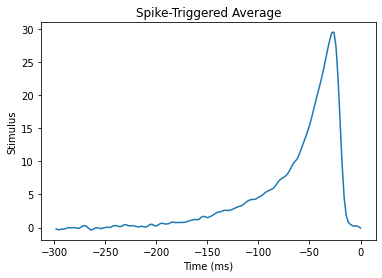

In [10]:
sta = compute_sta(stim, rho, num_timesteps)

time = (np.arange(-num_timesteps, 0) + 1) * sampling_period

plt.plot(time, sta)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus')
plt.title('Spike-Triggered Average')

plt.show()

In [8]:
print(len(sta))

150


## Quiz

1. Which of the following is not an example of a linear filtering system?  
Let $x\left(t\right)$ denote the input signal and $y\left(t\right)$ denote the output signal.

* (X) $y\left(t\right) = \sum_{n=0}^\infty a^n x\left(t-n\tau\right)$,  
where $a$ is between $0$ and $1$, and $\tau$ is positive.
* (X) $y\left(t\right) = \int_0^\infty e^{-\tau}x\left(t-\tau\right)d\tau$
* (X) $y\left(t\right) = 3x\left(t\right) - 5x\left(t - \tau\right)$,  
where $\tau$ is positive.
* (O) $y\left(t\right) = \cos \left[x\left(t - \theta\right)\right]$

2. What is the definition of a spike triggered average for a neuron?
* None of these.
* The set of stimuli preceding a spike, each averaged over time.
* **The stimuli preceding a spike, averaged over all stimuli that *elicited* a spike.**
* The average time between spikes in a recording.
* The set of all stimuli that elicit a spike.

3. The data set we have given you (see Quiz Instructions page in the Graded Quiz section) is comprised of a stimulus vector (named `stim`) and a binary vector (named `rho`). These two vectors are the same length because they represent measurements of two different quantities over the same time period. The binary vector has a 1 if a spike occurred in the time bin corresponding to the that index and a 0 otherwise. The sampling rate for the data set was 500 Hz.

  How many milliseconds are there between adjacent samples (what is the sampling period)? Only enter the number, not the units. If your answer is not an integer, round to the nearest integer value.

  Set the variable named `sampling_period` in `quiz2.py` equal to this value.

$\quad$Ans = `2`

4. We wish to compute the spike-triggered average for this neuron over a window of width 300 ms. Suppose we do not care about the value exactly 300 ms before the spike. How many elements (time steps) will be in our resulting spike-triggered average vector? Set the variable named num_timesteps in `quiz2.py` equal to this value and enter it below.

  Hint: Your answer should be an even number.

$\quad$Ans = `150`

5. In order to calculate the average, it is necessary for us to know how many time windows (stimulus vectors) we are averaging over. This is equal to the number of observed spikes. Write code to calculate the total number of spikes in the data set `c1p8.mat`. How many spikes were observed in this recording? You should not count any spikes that occur before 300 ms from the beginning of the recording.

  Set the variable named `num_spikes` in `compute_sta` equal to this value, or (better yet) use the expression/variable/code you used to calculate this value and set it equal to `num_spikes` so that your code will work for any set of parameters (different sampling rate, different time window in which average is calculated etc.) passed to `compute_sta.py`.  

$\quad$Ans = `53583`

6. Now we may compute the spike-triggered average. To do this, add code to `compute_sta.py`. Remember that the spike-triggered average is the element-wise mean of the time windows starting 300 ms before (exclusive) and ending 0 ms before a spike. Note that we have given you code to find all of the indices in the stimulus vector that correspond to the spike times (labeled as the variable spike_times in `compute_sta.py`).

  Which of these plots most closely matches the spike-triggered average for this data set?  

$\quad$Ans = As shown in `plt plot`

7. What is the nature of this neuron? That is, what mathematical operation of the stimulus does it compute?
* Running average/sum.
* No response.
* **Leaky integration.**
* Differentiation.

8. Which of the following stimuli would you expect this neuron to respond most strongly to? You may assume that all non-zero values of the stimulus have the same magnitude. That is, assume that all positive stimuli have a value of $c$ and all negative stimuli have a value of $-c$ where $c > $.
* No difference.
* A negative value followed by a positive value.
* A constant negative value.
* A positive value followed by a negative value.
* **A constant positive value.**

9. Suppose we had reason to suspect that this neuron responded to two modes (features) of the stimulus. Which of the following methods is most likely to help us determine those two modes?
* **Principal component analysis/covariance analysis**
* Computing the spike-triggered average normally.
* Dividing the spikes into two disjoint sets and computing the spike-triggered average for each of those sets independently.
* Computing the spike-triggered average to get the first mode and then subtracting it from the stimulus in each time window before a spike and then computing the spike-triggered average for the resulting signal to get the second mode.